In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

## Exploring the data

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.shape

(891, 12)

In [11]:
data_test.shape

(418, 11)

In [15]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Problem Definition

I have a training dataset with 891 samples (people) who embarked the titanic. I want to predict who is more likely to die according to the features I have about them and find some correlation with what I know.

In [5]:
# To check the missing values and data types
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing values in Age, Cabin and embarked.

In [6]:
# Info about numerical values
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data_train['PassengerId'].nunique()

891

In [19]:
# Drop columns of unique values: not necessary for this use case
data_train.drop(columns='PassengerId', inplace=True)
data_test.drop(columns='PassengerId', inplace=True)

In [20]:
# Info about categorical values
data_train.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [21]:
# Let's split into numerical and categorical features 
cat = ['Survived','Sex','Embarked','Pclass']
# Not using 'name', 'ticket', 'home.dest', 'body' and 'cabin' for now since almost unique, I might extract features from them
num = data_train.drop(columns=cat+['Name','Ticket', 'Cabin']).columns

### Data Distribution

C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E 

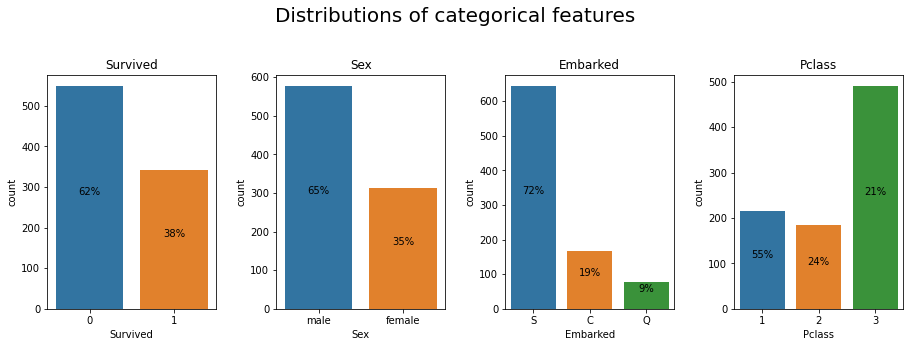

In [49]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Distributions of categorical features', fontsize=20)
num_cols = 4
num_rows = 1

for i, col in enumerate(cat):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    g = sns.countplot(data_train[col], ax=ax)
    ax.set_title(col)
    for j,p in enumerate(g.patches):
        g.annotate(format((data_train[col].value_counts()/data_train[col].count()).iloc[j], '.0%'), \
                   (p.get_x() + p.get_width() / 2., \
                    p.get_height()/2 -10), \
                   ha = 'center', \
                   va = 'center', \
                   xytext = (0, 10), \
                   textcoords = 'offset points')
plt.tight_layout(pad=2)

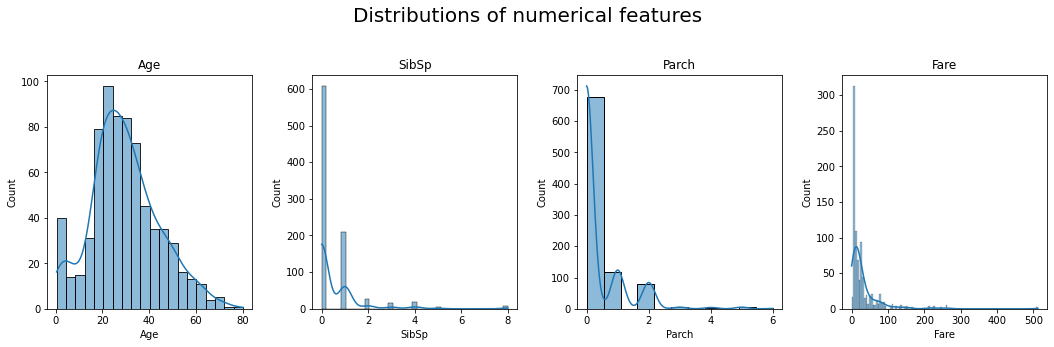

In [26]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Distributions of numerical features', fontsize=20)
num_cols = 4
num_rows = 1

for i, col in enumerate(num):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.histplot(data_train[col], ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout(pad=2)


Most people in the data set are between 20 to 40 <br>
Most dont have siblings <br>
most dont have parents nor children onboard <br>
Most paid more than 0 and less than 100 (0 has to be investigated)

### Data Distribution against the dependent variable (Survived)

In [51]:
for c in cat:
    print(pd.crosstab(data_train[c],data_train['Survived']).apply(lambda x: round(x/x.sum(),2), axis=1), '\n\n')

Survived    0    1
Survived          
0         1.0  0.0
1         0.0  1.0 


Survived     0     1
Sex                 
female    0.26  0.74
male      0.81  0.19 


Survived     0     1
Embarked            
C         0.45  0.55
Q         0.61  0.39
S         0.66  0.34 


Survived     0     1
Pclass              
1         0.37  0.63
2         0.53  0.47
3         0.76  0.24 




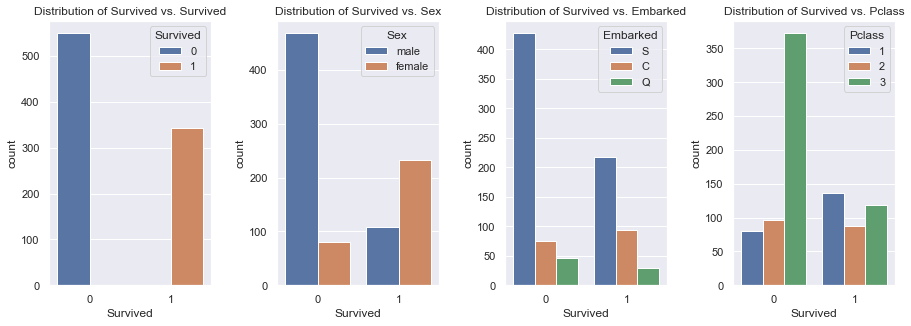

In [56]:
fig = plt.figure(figsize=(13, 5))
num_cols = 4
num_rows = 1

for i, c in enumerate(cat):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.countplot(x = data_train['Survived'],  hue = data_train[c], data=data_train, ax=ax)
    ax.set_title('Distribution of Survived vs. {}'.format(c))
plt.tight_layout(pad=2)

Very interesting results: female have a survival rate higher than male, those who embarked in C are more likely to survive than the others and those in class 1 also. Could mean that the people in class 1 were the one that were saved first.

In [60]:
data_train[['Age', 'SibSp', 'Parch', 'Fare','Survived']].groupby('Survived').agg(['mean', 'median'])

Age            SibSp            Parch              Fare       
               mean median      mean median      mean median       mean median
Survived                                                                      
0         30.626179   28.0  0.553734    0.0  0.329690    0.0  22.117887   10.5
1         28.343690   28.0  0.473684    0.0  0.464912    0.0  48.395408   26.0

The mean and median age are very close for survival rate <br>
The mean of siblings and parents are less than 1 for both survived and not survived <br>
We can see that the people who survived have higher mean and median fare. I saw that people in first class have higher survival rate so it makes sense.

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_18160/2449149805.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.tril(np.ones_like(corr, dtype=np.bool))


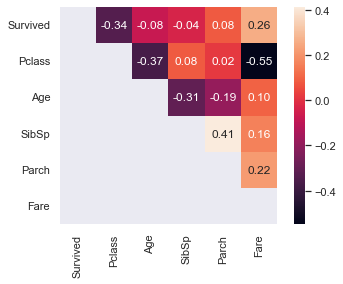

In [62]:
# Correlation between numerical values
corr = data_train.corr()
mask = np.tril(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(data_train.corr(), annot=True, fmt=".2f", mask = mask, square = True)

We have a high negative correlation between fare and Pclass (makes sense since higher the class (actually lower class: 3<1) lower fare). Still I won't remove this column since not enough correlated

## None Values

In [106]:
# percentage of none values in columns containing none values
data.isna().sum()[data.isna().sum()>0]/data.shape[0]

age          0.200917
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

### Fare

In [107]:
# the fare is very dependent on the class, let's understand what are the fares
data.groupby('pclass')['fare'].agg(['mean','median','std', 'min', 'max'])

,mean,median,std,min,max
pclass,,,,,
1,87.508992,60.0000,80.447178,0.0,512.3292
2,21.179196,15.0458,13.607122,0.0,73.5000
3,13.302889,8.0500,11.494358,0.0,69.5500


I see I have 0 for every class, I would guess it means either in the data, the values where they did not have info, they replaced it by with 0 (for example people that bought their ticket through someone else) or some people got the ticket for free

In [109]:
(data['fare']==0).sum()

17

Only 17 of them have a fare of 0. Not worst the time investigating

In [110]:
data[data['fare'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [115]:
data['fare'].fillna(data.groupby('pclass')['fare'].transform('median'), inplace=True)

### embarked

In [116]:
data[data['embarked'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [123]:
data.groupby('embarked')['pclass'].value_counts()

embarked  pclass
C         1         141
          3         101
          2          28
Q         3         113
          2           7
          1           3
S         3         495
          2         242
          1         177
Name: pclass, dtype: int64

In [127]:
data[data['cabin'].str.contains(r'B', na=True)]

TypeError: 'StringMethods' object is not callable

In [118]:
data['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [120]:
data[data['cabin']=='B26']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.55,B26,S,7,NaN,"Milwaukee, WI"
